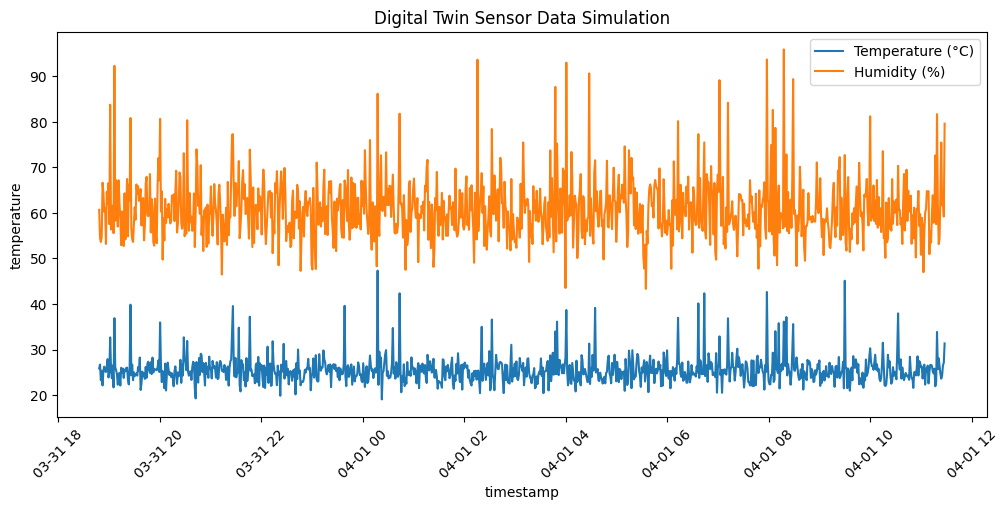

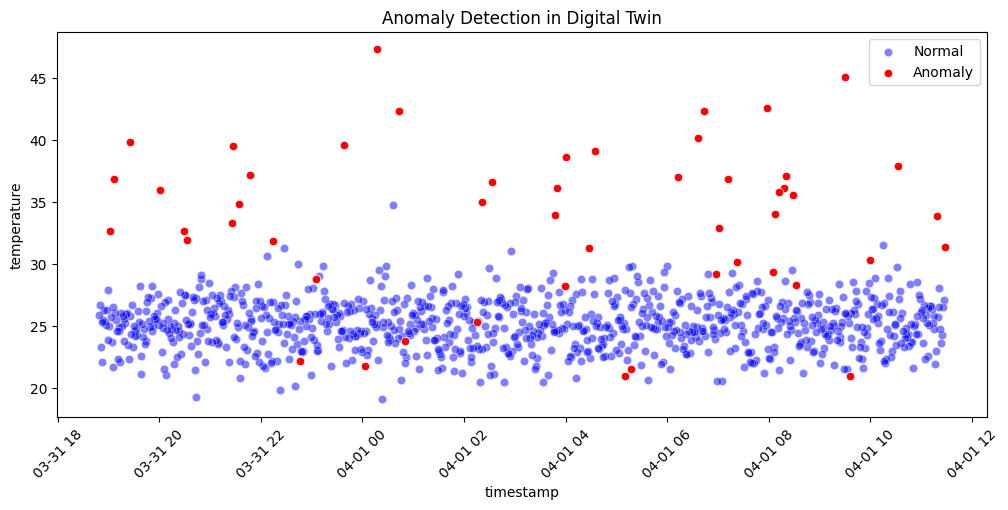

Total Data Points: 1000
Anomalies Detected: 50


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from datetime import datetime, timedelta

# Simulating IoT Sensor Data for a Digital Twin
def generate_sensor_data(n=1000, anomaly_ratio=0.05):
    timestamps = [datetime.now() - timedelta(minutes=i) for i in range(n)]
    temperature = np.random.normal(loc=25, scale=2, size=n)
    humidity = np.random.normal(loc=60, scale=5, size=n)

    # Introduce anomalies
    num_anomalies = int(n * anomaly_ratio)
    anomaly_indices = np.random.choice(n, num_anomalies, replace=False)
    temperature[anomaly_indices] += np.random.normal(10, 5, num_anomalies)
    humidity[anomaly_indices] += np.random.normal(20, 10, num_anomalies)

    data = pd.DataFrame({'timestamp': timestamps, 'temperature': temperature, 'humidity': humidity})
    return data

# Generate simulated data
data = generate_sensor_data()

# Plot data
plt.figure(figsize=(12,5))
sns.lineplot(x=data['timestamp'], y=data['temperature'], label='Temperature (°C)')
sns.lineplot(x=data['timestamp'], y=data['humidity'], label='Humidity (%)')
plt.xticks(rotation=45)
plt.title("Digital Twin Sensor Data Simulation")
plt.legend()
plt.show()

# Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = model.fit_predict(data[['temperature', 'humidity']])

# Visualizing anomalies
plt.figure(figsize=(12,5))
anomalous_data = data[data['anomaly'] == -1]
sns.scatterplot(x=data['timestamp'], y=data['temperature'], label='Normal', color='blue', alpha=0.5)
sns.scatterplot(x=anomalous_data['timestamp'], y=anomalous_data['temperature'], label='Anomaly', color='red')
plt.xticks(rotation=45)
plt.title("Anomaly Detection in Digital Twin")
plt.legend()
plt.show()

# Print summary
print(f"Total Data Points: {len(data)}")
print(f"Anomalies Detected: {len(anomalous_data)}")
